In [13]:
!pip install garden-ai
!pip install "numpy<2" opencv-python-headless torch torchvision matplotlib



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl (271 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.0 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl (66 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (10

In [4]:
from garden_ai import GardenClient
garden_client = GardenClient()

In [5]:
rts_garden = garden_client.get_garden('10.26311/x49j-2v19')
rts_garden


In [6]:
image_url="https://github.com/cyber2a/Cyber2A-RTS-ToyModel/blob/main/data/images/valtest_yg_055.jpg?raw=true"
pred = rts_garden.identify_rts(image_url)
pred

{'boxes': tensor([[ 69.4303, 134.2501, 111.9559, 173.3981]]),
 'labels': tensor([1]),
 'scores': tensor([0.6037]),
 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]])}

In [7]:
import requests
import tempfile
from torchvision.io import read_image

response = requests.get(image_url)
with tempfile.NamedTemporaryFile(delete=True, suffix='.jpg') as tmp_file:
    # Write the content to the temporary file
    tmp_file.write(response.content)
    tmp_file_path = tmp_file.name
    image = read_image(tmp_file_path)

In [9]:
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import cv2


def draw_predictions(image, pred):
    pred_labels = [f"RTS: {score:.3f}" for score in pred["scores"]]
    masks = (pred["masks"] > 0.7).squeeze(1)
    output_image = draw_segmentation_masks(image, masks, alpha=0.5, colors="red")
    pred_boxes = pred["boxes"].long()
    output_image = draw_bounding_boxes(
        output_image, pred_boxes, pred_labels, colors="black", width=0
    )
    return output_image


output_image = draw_predictions(image, pred)

i1 = output_image.permute(1, 2, 0).numpy()
i2 = cv2.cvtColor(i1, cv2.COLOR_RGB2BGR)


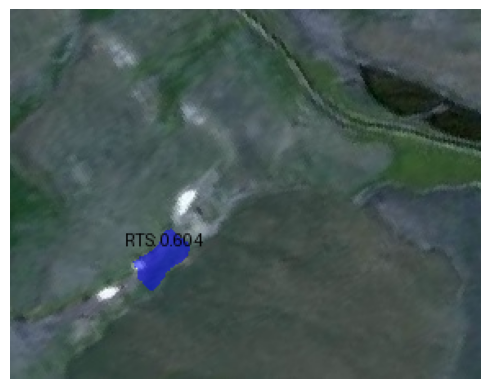

In [14]:
import matplotlib.pyplot as plt
plt.imshow(i2)
plt.axis('off')  # Optional: Hides the axis ticks and labels
plt.show()